# Doctor Consultantcy Fees Prediction
1)Qualification: Qualification and degrees held by the doctor 2)Experience: Experience of the doctor (number of years) 3)Rating: Rating given by patients 4)Profile: Type of the doctor 5)Miscellaeous_Info: Extra information about the doctor 6)Place: Area and the city where the doctor is located 7)Fees: Fees charged by the doctor(Target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [7]:
train.describe(include = 'object')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


In [8]:
train.shape

(5961, 7)

In [9]:

train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [10]:

train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 302.8+ KB


In [12]:

train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [13]:
train['Place'].fillna('Unknown', inplace = True)

In [14]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [15]:

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

In [16]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [17]:
train.drop('Place', axis = 1, inplace= True)

In [18]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [19]:
train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
69%       4
70%       4
57%       3
72%       3
62%       2
64%       2
55%       2
33%       2
63%       2
36%       1
7%        1
48%       1
40%       1
45%       1
65%       1
47%       1
58%       1
53%       1
Name: Rating, dtype: int64

In [20]:
train['Rating'].fillna('-1%', inplace = True)

In [21]:
train['Rating'] = train['Rating'].str.slice(stop = -1).astype(int)

In [22]:

train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-1,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-1,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [23]:
bins = [-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [i for i in range(11)]

train['Rating'] = pd.cut(train['Rating'], bins = bins, labels = labels,include_lowest = True )

In [24]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [25]:

train.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile',
       'Miscellaneous_Info', 'Fees', 'locality', 'city'],
      dtype='object')

In [26]:
train['Qualification'].value_counts()

BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, F.C.I.P                                                                                                                   1
BAMS, PG Diploma in Panchakarma                                                           

In [27]:

# Qualification

train['Qualification_count'] = train['Qualification'].apply(lambda x: len(x.split(",")))
train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [28]:
train[train['Qualification_count'] == 10]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,10,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Ashok Nagar,Chennai,10


In [29]:
train[train['Qualification_count'] == 8]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count
3562,"MBBS, Diploma in Family Medicine (DFM), Certif...",5,0,General Medicine,NaN,700,Coimbatore Racecourse,Coimbatore,8
4174,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",29,8,General Medicine,"76% 8 Feedback Old Rajendra Nagar, Delhi",100,Old Rajendra Nagar,Delhi,8


In [30]:
train['Qualification'].nunique()

1420

In [31]:
train['Qualification'] = train['Qualification'].str.split(",")

Qualification = {}
for x in train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:
            Qualification[qual] +=1 # =+ 1
        else:
            Qualification[qual] = 1

In [32]:
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [33]:

top_ten = sorted(Qualification.items(),key = lambda x: x[1], reverse=True)[:10]

final_qual = []

for qual in top_ten:
    final_qual.append(qual[0])

In [34]:
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [35]:
for qual in final_qual:
    train[qual] = 0
    
for x, y in zip(train['Qualification'].values, np.array([ i for i in range(len(train))])):
    for z in x:
        z = z.strip()
        if z in final_qual:
            train[z][y] = 1
    

C:\Users\Bhushan kakde\AppData\Local\Temp\ipykernel_24256\2589209567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[z][y] = 1


In [36]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,2,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,2,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1,0,0,1,0,0,0,0,0,0,0


In [37]:
train.drop(['Qualification', 'Qualification_count'], axis = 1, inplace = True)

In [38]:
train.head()


,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [39]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees',
       'locality', 'city', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [40]:
train['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [41]:
import re

In [42]:
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))

train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
nan                     26
Sector5                  1
Name: city, dtype: int64

In [43]:
train['city'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'nan', 'Sector5'],
      dtype=object)

In [44]:

train[(train['city'] == 'Sector5') | (train['city'] == 'nan')]


,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0


In [45]:
train['city'] = np.where(train['city'] == 'Sector5', 'Delhi', train['city'])

In [46]:

train[(train['city'] == 'nan')]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
91,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
502,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
599,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
605,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
724,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1002,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1083,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
1210,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2078,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0
2178,0,0,Dermatologists,NaN,100,Unknown,nan,0,0,0,0,0,0,0,0,0,0


In [47]:
train['city'] = np.where(train['city'] == 'nan', 'Unknown', train['city'])

In [48]:

train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [49]:
train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [50]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees',
       'locality', 'city', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [51]:
# Data Visualization & Data Encoding

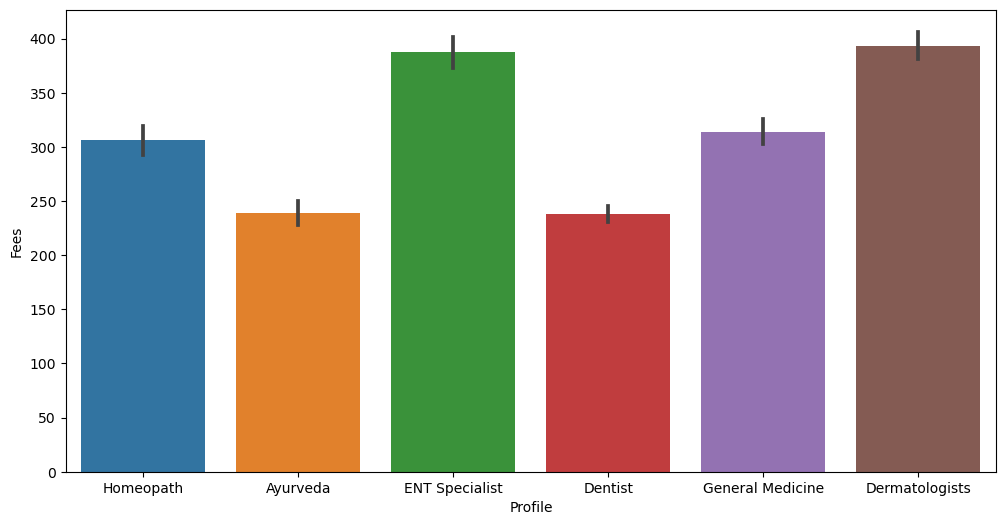

In [52]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Profile', y = 'Fees', data = train)
plt.show()

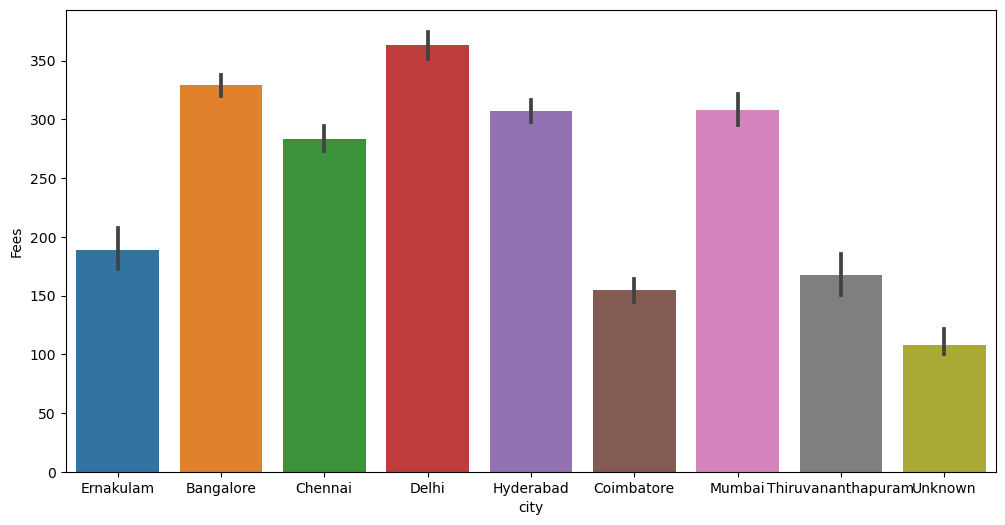

In [53]:

plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y = 'Fees', data = train)
plt.show()

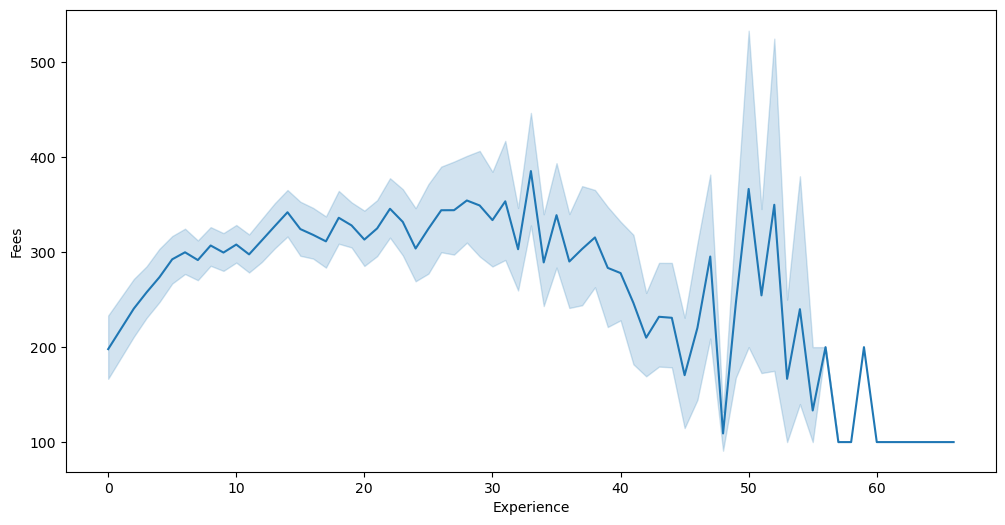

In [54]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Experience', y = 'Fees', data = train)
plt.show()

In [55]:

train.head(3)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0


In [56]:
train = pd.get_dummies(train, columns = ['city', 'Profile'], prefix = ['city', 'Profile'])

In [57]:
train.head()

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

In [59]:
train

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD_Dermatology,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,NaN,100,Nungambakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,General Medical Consultation Viral Fever Treat...,100,Vileparle West,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [60]:
train.drop(['Miscellaneous_Info', 'locality'], axis = 1, inplace = True)

In [61]:
train.head(3)

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Test Data

In [62]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [63]:
# convert cat into numerical 
test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

# Extract city and localityfrom Place columns
test['Place'].fillna('Unknown,Unknown',inplace=True)
test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]

#drop place column
test.drop('Place',axis=1,inplace=True)

#Rating column
test['Rating'].fillna('-1%',inplace=True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [65]:
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    test[title] = 0

for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
test.drop('Qualification',axis=1,inplace=True)


#city column
test['city'] = test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
test = pd.get_dummies(test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [66]:
test.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,35,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,31,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,40,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
x = train.drop('Fees', axis = 1)
y = train['Fees']

In [68]:

x

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,MD_General_Medicine,...,city_Hyderabad,city_Mumbai,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [69]:

y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


In [73]:


x_train.shape

(4768, 27)

In [74]:
x_test.shape

(1193, 27)

# Model Building


In [75]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [76]:
def r_score1(y_pred,y):
    
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = r_score1, greater_is_better=True)

In [79]:
KNN_reg = KNeighborsRegressor()
SVR_reg = SVR()
RAN_reg = RandomForestRegressor()

In [82]:
for reg in (KNN_reg, SVR_reg, RAN_reg):
    reg.fit(x_train,y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, (y_pred,y_test))

KNeighborsRegressor() (array([250., 290., 250., ..., 300., 320., 300.]), 1398    300
4310    500
2455    250
2285    800
3891    100
       ... 
5638    350
567     500
2601    100
1524    100
4287    250
Name: Fees, Length: 1193, dtype: int64)
SVR() (array([246.60921748, 256.27565846, 294.29929974, ..., 248.37789299,
       262.91567126, 260.22648548]), 1398    300
4310    500
2455    250
2285    800
3891    100
       ... 
5638    350
567     500
2601    100
1524    100
4287    250
Name: Fees, Length: 1193, dtype: int64)
RandomForestRegressor() (array([267.35357143, 273.7163961 , 223.67703256, ..., 267.32938312,
       199.77777778, 295.25      ]), 1398    300
4310    500
2455    250
2285    800
3891    100
       ... 
5638    350
567     500
2601    100
1524    100
4287    250
Name: Fees, Length: 1193, dtype: int64)
